<a href="https://colab.research.google.com/github/ParkEunbin/gnbai20201/blob/master/lab2/ParkEunBin/gnbai_lab2_Parkeunbin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GnB AI Project Assignment
## Lab 2: Regularized Regression


### Tasks
1. data_lab2.txt의 데이터를 읽고, train 데이터 70%, test 데이터 30%로 분할하여라.
2. 다음의 가설 함수들에 대해 파라미터의 최적값을 구하여라.
    
    (비정규화 회귀는 최소 제곱법, 정규화 회귀는 closed-form solution 사용)
    
    * 비정규화 회귀 – 선형 모델
    * 비정규화 회귀 – 2차 다항식 모델
    * 비정규화 회귀 – 5차 다항식 모델
    * 정규화 회귀 – 5차 다항식 모델 (Ridge)

3. train 데이터 위에 학습된 회귀자들을 plot하고, train error를 구하여라.
4. test 데이터 위에 학습된 회귀자들을 plot하고, test error를 구하여라

### Imports

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Train-test split

In [54]:
# pandas를 통해 txt 파일 읽어오기
name_file = './data_lab2.txt'
columns = ['x', 'y']

data_pd = pd.read_csv(name_file, names=columns, sep='\t')

print(data_pd)

         x       y
0     2.94  34.340
1     3.06  34.520
2     3.07  34.318
3     3.16  34.360
4     3.26  34.490
..     ...     ...
195  16.10  33.770
196  16.14  33.808
197  16.52  33.851
198  16.82  33.953
199  17.10  33.950

[200 rows x 2 columns]


In [55]:
# pandas dataframe을 numpy array로 변환
data_np = data_pd.values

# data_pd는 더이상 필요하지 않으므로 메모리를 비워줍니다.
del data_pd

# 데이터의 순서를 랜덤으로 섞기
np.random.shuffle(data_np)

# 처음과 끝의 5개의 데이터를 출력
print(data_np[:5])
print('...')
print(data_np[-5:])

[[ 5.6   34.04 ]
 [14.21  33.488]
 [10.45  33.431]
 [ 6.49  34.04 ]
 [ 9.6   33.104]]
...
[[ 5.58  34.167]
 [10.51  33.39 ]
 [12.64  33.068]
 [ 9.69  32.43 ]
 [ 7.06  33.934]]


In [56]:
# train set과 test set의 크기를 결정
data_size = len(data_np)

train_size = int(data_size * 0.7)
test_size = data_size - train_size

# train-test set 나누기
x_train = data_np[:train_size, 0].reshape(-1, 1)
y_train = data_np[:train_size, 1].reshape(-1, 1)

x_test = data_np[-test_size:, 0].reshape(-1, 1)
y_test = data_np[-test_size:, 1].reshape(-1, 1)

# data_np도 더이상 필요하지 않으므로 메모리를 비워줍니다.
del data_np

print("shape of x_train :", x_train.shape)
print("shape of y_train :", y_train.shape)
print("shape of x_test :", x_test.shape)
print("shape of y_test :", y_test.shape)

shape of x_train : (140, 1)
shape of y_train : (140, 1)
shape of x_test : (60, 1)
shape of y_test : (60, 1)


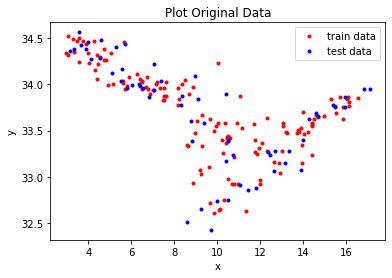

In [57]:
# data plot하기
plt.title('Plot Original Data')
plt.plot(x_train, y_train, 'r.', label='train data')
plt.plot(x_test, y_test, 'b.', label='test data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 2. Finding optimal parameters

#### 모델 정의

1. 비정규화 회귀 – 선형 모델
    
    $h_\theta^{(1)}(x)=\theta_0+\theta_1x_1 \quad\quad\left(x_n=x^n\right)$

2. 비정규화 회귀 – 2차 다항식 모델
    
    $h_\theta^{(2)}(x)=\theta_0+\theta_1x_1+\theta_2x_2$

3. 비정규화 회귀 – 5차 다항식 모델
    
    $h_\theta^{(3)}(x)=\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_3+\theta_4x_4+\theta_5x_5$

4. 정규화 회귀 – 5차 다항식 모델 (Ridge)
    
    $h_\theta^{(4)}(x)=\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_3+\theta_4x_4+\theta_5x_5$


##### 각 모델들의 x 행렬
$
X^{(h^{(1)})}=
  \begin{bmatrix}
    1 & x_1^{(1)} \\
    1 & x_1^{(2)} \\
    \vdots & \vdots \\
    1 & x_1^{(I)} \\
  \end{bmatrix}
$ 

$
X^{(h^{(2)})}=
  \begin{bmatrix}
    1 & x_1^{(1)} & x_2^{(1)} \\
    1 & x_1^{(2)}& x_2^{(2)} \\
    \vdots & \vdots & \vdots \\
    1 & x_1^{(I)}& x_2^{(I)} \\
  \end{bmatrix}
$ 

$
X^{(h^{(3)})}=
  \begin{bmatrix}
    1 & x_1^{(1)} & \cdots & x_5^{(1)} \\
    1 & x_1^{(2)}& \cdots & x_5^{(2)} \\
    \vdots & \vdots &  & \vdots \\
    1 & x_1^{(I)}& \cdots & x_5^{(I)} \\
  \end{bmatrix}
$ 

$
X^{(h^{(4)})}=
  \begin{bmatrix}
    1 & x_1^{(1)} & \cdots & x_5^{(1)} \\
    1 & x_1^{(2)}& \cdots & x_5^{(2)} \\
    \vdots & \vdots &  & \vdots \\
    1 & x_1^{(I)}& \cdots & x_5^{(I)} \\
  \end{bmatrix}
$


In [58]:
# 1. 비정규화 선형 회귀: x1_train
x1_train=np.column_stack((np.ones_like(x_train),x_train))
# print(x1_train[:10])
# 2. 비정규화 2차 회귀: x2_train
x2_train=np.column_stack((np.ones_like(x_train),x_train,pow(x_train,2)))
#print(x2_train[:10])
# 3. 비정규화 5차 회귀: x3_train
x3_train=np.column_stack((np.ones_like(x_train),x_train,pow(x_train,2),pow(x_train,3),pow(x_train,4),pow(x_train,5)))
# 4. 정규화 5차 회귀: x4_train
x4_train=np.column_stack((np.ones_like(x_train),x_train,pow(x_train,2),pow(x_train,3),pow(x_train,4),pow(x_train,5)))
# x1_train, x2_train, x3_train, x4_train의 shape 출력
print('shape of x1_train',x1_train.shape)
print('shape of x2_train',x2_train.shape)
print('shape of x3_train',x3_train.shape)
print('shape of x4_train',x4_train.shape)


shape of x1_train (140, 2)
shape of x2_train (140, 3)
shape of x3_train (140, 6)
shape of x4_train (140, 6)


In [59]:
# 1. 비정규화 선형 회귀: x1_test
x1_test=np.column_stack((np.ones_like(x_test),x_test))
# 2. 비정규화 2차 회귀: x2_test
x2_test=np.column_stack((np.ones_like(x_test),x_test,pow(x_test,2)))
# 3. 비정규화 5차 회귀: x3_test
x3_test=np.column_stack((np.ones_like(x_test),x_test,pow(x_test,2),pow(x_test,3),pow(x_test,4),pow(x_test,5)))
# 4. 정규화 5차 회귀: x4_test
x4_test=np.column_stack((np.ones_like(x_test),x_test,pow(x_test,2),pow(x_test,3),pow(x_test,4),pow(x_test,5)))
# x1_test, x2_test, x3_test, x4_test의 shape 출력
print('shape of x1_test',x1_test.shape)
print('shape of x2_test',x2_test.shape)
print('shape of x3_test',x3_test.shape)
print('shape of x4_test',x4_test.shape)

shape of x1_test (60, 2)
shape of x2_test (60, 3)
shape of x3_test (60, 6)
shape of x4_test (60, 6)


#### 2) Finding parameters
1. 비정규화 회귀 모델의 최소 제곱법에 의한 해
    
    $\theta^*=\left(x^Tx\right)^{-1}x^Ty$

2. Ridge 정규화 회귀 모델의 닫힌 형태의 해
    
    $\theta^*=\left(x^Tx+\lambda  
        \begin{bmatrix}
            0 & 0 & \cdots & 0 \\
            0 & 1 & \cdots & 0 \\
            \vdots & \vdots & \ddots & \vdots \\
            0 & 0 & \cdots & 1 \\
        \end{bmatrix}
    \right)^{-1}x^Ty$

In [60]:
# 1. 비정규화 선형 회귀: theta1
theta1 =np.matmul(np.linalg.inv(np.matmul(np.transpose(x1_train),x1_train)),np.matmul(np.transpose(x1_train),y_train))

# 2. 비정규화 2차 회귀: theta2
theta2 =np.matmul(np.linalg.inv(np.matmul(np.transpose(x2_train),x2_train)),np.matmul(np.transpose(x2_train),y_train))

# 3. 비정규화 5차 회귀: theta3
theta3 =np.matmul(np.linalg.inv(np.matmul(np.transpose(x3_train),x3_train)),np.matmul(np.transpose(x3_train),y_train))

# 4. 정규화 5차 회귀: theta4
Lambda = 0.2
A=np.eye(6)
A[0,0]=0
print(A)
theta4 =np.matmul(np.linalg.inv(np.matmul(np.transpose(x4_train),x4_train)+Lambda*A),np.matmul(np.transpose(x4_train),y_train))
# theta값 출력
print(theta1)
print(theta2)
print(theta3)
print(theta4)

[[0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
[[34.37113839]
 [-0.07078895]]
[[ 3.57931044e+01]
 [-4.19970850e-01]
 [ 1.81431008e-02]]
[[ 3.63618743e+01]
 [-1.48434475e+00]
 [ 4.31094224e-01]
 [-6.08432316e-02]
 [ 3.80797290e-03]
 [-8.53686710e-05]]
[[ 3.44772903e+01]
 [-2.22744803e-01]
 [ 1.22172907e-01]
 [-2.57806447e-02]
 [ 1.94042956e-03]
 [-4.76383009e-05]]


## 3. Plot training data with fitted curve

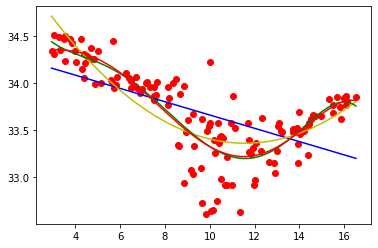

In [61]:
# 데이터의 순서를 shuffle했기 때문에 
# 데이터의 순서대로 plot하면 정상적으로 그려지지 않으므로
# 일정한 간격으로 오름차순의 구간을 만들어주는 np.linspace 사용
x = np.linspace(min(x_train), max(x_train), 140)

y1_train=theta1[0]+theta1[1]*x
y2_train=theta2[0]+theta2[1]*x+theta2[2]*(x**2)
y3_train=theta3[0]+theta3[1]*x+theta3[2]*(x**2)+theta3[3]*(x**3)+theta3[4]*(x**4)+theta3[5]*(x**5)
y4_train=theta4[0]+theta4[1]*x+theta4[2]*(x**2)+theta4[3]*(x**3)+theta4[4]*(x**4)+theta4[5]*(x**5)


# x_train의 최솟값부터 최댓값까지 128등분

# train data와 regressor 함께 plot하기
plt.plot(x_train, y_train,'ro')
plt.plot(x,y1_train,'b')
plt.plot(x,y2_train,'y')
plt.plot(x,y3_train,'g')
plt.plot(x,y4_train,'r')

## 4. Compute traing errors

* MSE (Mean of Squared Error)
    - 데이터의 갯수가 다르더라도 오차값을 비교할 수 있다.

$$MSE=\dfrac{1}{I}\sum_{i=1}^I\left(\hat{y}-y\right)^2$$

* SSE (Sum of Squared Error)
    - 미분 계산 시에 수식이 깔끔하다.

$$SSE=\dfrac{1}{2}\sum_{i=1}^I\left(\hat{y}-y\right)^2$$

In [0]:
def MSE(y_hat, y):
    result = 0.
    # result 값을 완성해보세요!
    for i in range (y.shape[0]):
      result=result+pow((y_hat[i]-y[i]),2)
    result=(1/y.shape[0])*result

    return result

In [0]:
def get_error(theta_n, x_n, y):

    # 임의의 회귀 모델의 입력 x_n과
    # 계산한 파라미터 theta_n으로
    # y_hat 행렬을 구해보세요!

    y_hat=np.matmul(x_n,theta_n)
    return MSE(y_hat, y)

In [64]:
# get_error() 함수로 4개의 모델의 train error 구하기
print(theta1.shape)
print(x1_train.shape)
print(y1_train.shape)

train_error1=get_error(theta1,x1_train,y_train)
train_error2=get_error(theta2,x2_train,y_train)
train_error3=get_error(theta3,x3_train,y_train)
train_error4=get_error(theta4,x4_train,y_train)
# train error 출력하기
print(train_error1)
print(train_error2)
print(train_error3)
print(train_error4)

(2, 1)
(140, 2)
(140, 1)
[0.13782986]
[0.07456746]
[0.05900292]
[0.05945959]


## 5. Plot test data with fitted curve

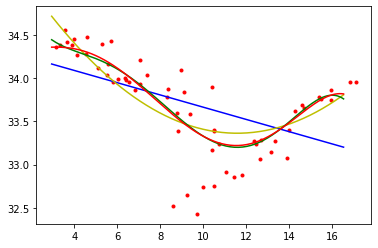

In [65]:
# x_test의 최솟값부터 최댓값까지 128등분
x_t = np.linspace(min(x_train), max(x_train), 128)
# test data와 regressor 함께 plot하기
plt.plot(x_test,y_test,'r.')
plt.plot(x,y1_train,'b')
plt.plot(x,y2_train,'y')
plt.plot(x,y3_train,'g')
plt.plot(x,y4_train,'r')

## 6. Compute test errors

In [66]:
# get_error() 함수로 4개의 모델의 test error 구하기

test_error1=get_error(theta1,x1_test,y_test)
test_error2=get_error(theta2,x2_test,y_test)
test_error3=get_error(theta3,x3_test,y_test)
test_error4=get_error(theta4,x4_test,y_test)
# test error 출력하기
print(test_error1)
print(test_error2)
print(test_error3)
print(test_error4)

[0.21220456]
[0.11172504]
[0.09223952]
[0.09016684]
